In [7]:
import numpy as np
np.__version__

'1.19.5'

In [8]:
import sklearn.tree as tree
import sklearn.ensemble as ensemble
from pyearth import Earth
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [9]:
class generator:
    def __init__(self,n,p=50):
        self.n=n
        self.p=p
        self.X=np.zeros((n,p))
        self.y=np.zeros(n)
        self.eps=np.random.normal(0,0.1,n)
    def generate(self,k=1):
        if k in set([1,2,4]):
             self.feature_one(k)    
        else:
             self.feature_two(k)
        return self.X,self.y
    def feature_two(self,k):
        self.X=np.random.normal(0,1,(self.n,self.p))
        X=self.X[:,0]
        if k == 3:
            self.y=np.where(X>0,X,0)+np.where(X-1>0,X-1,0)+self.eps
        if k == 5:
            self.y=np.where(X<0,1,0)
    def feature_one(self,k):
        self.X[:,0]=np.random.uniform(0,4,self.n)
        self.X[:,1:self.p]=np.random.uniform(0,1,(self.n,self.p-1))
        X=self.X[:,0]
        if k == 1:
            self.y=np.sqrt(X)+self.eps
        if k == 2:
            self.y=np.square(X)+self.eps
        if k == 4:
            self.y=np.sin(X)+self.eps
    

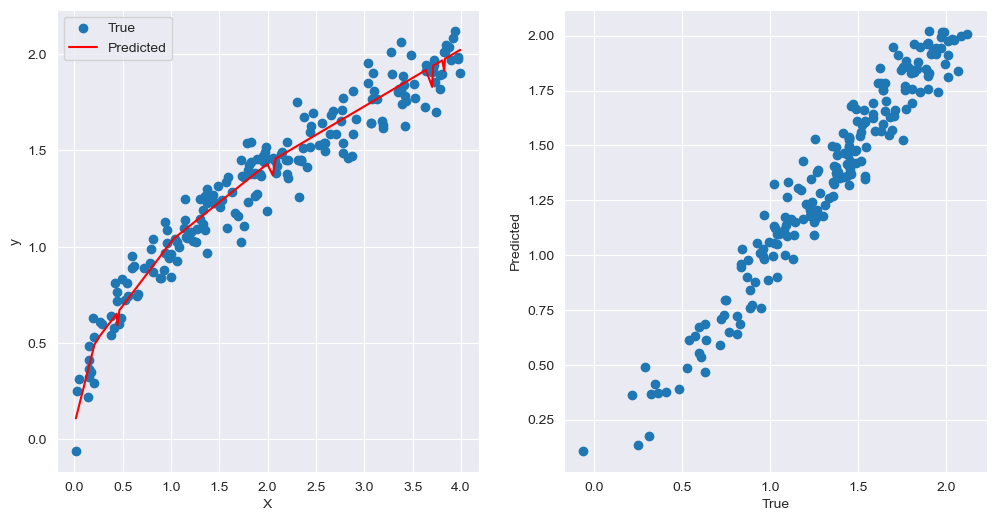

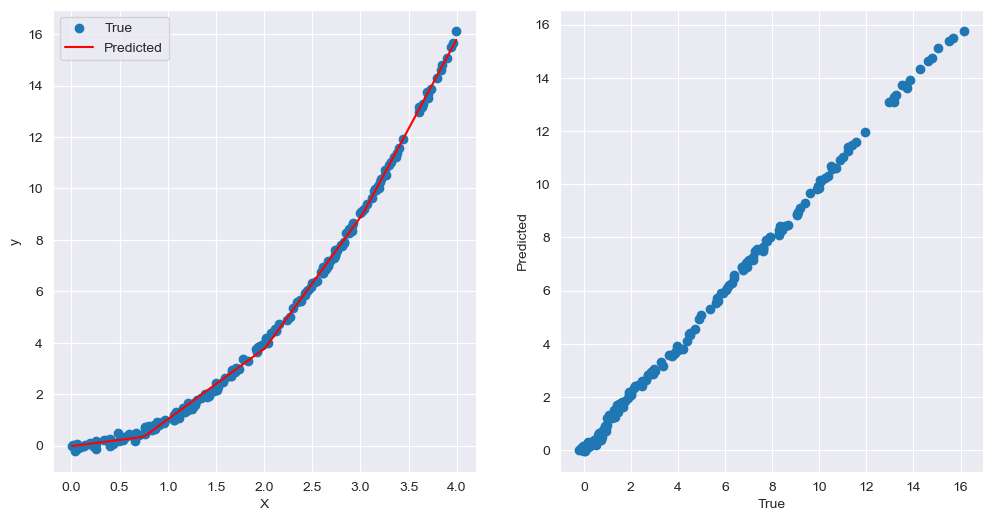

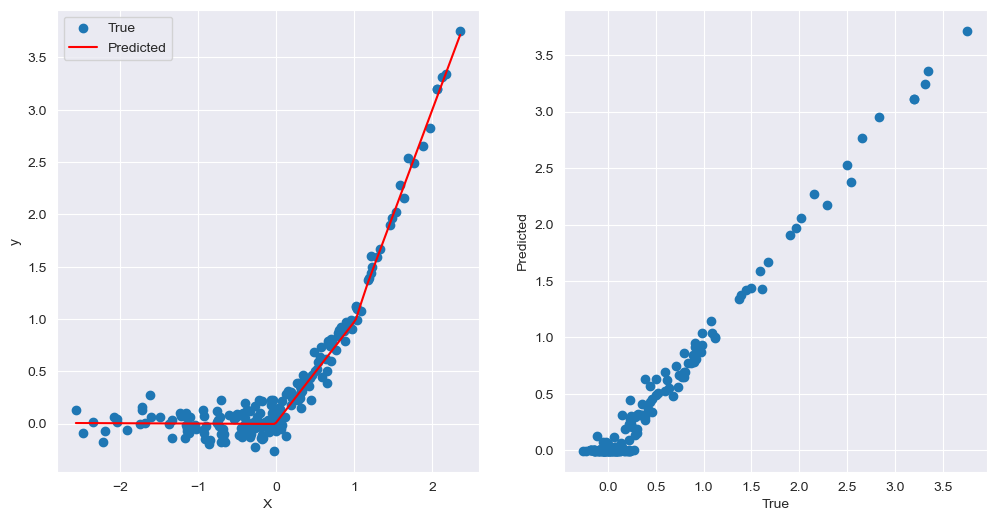

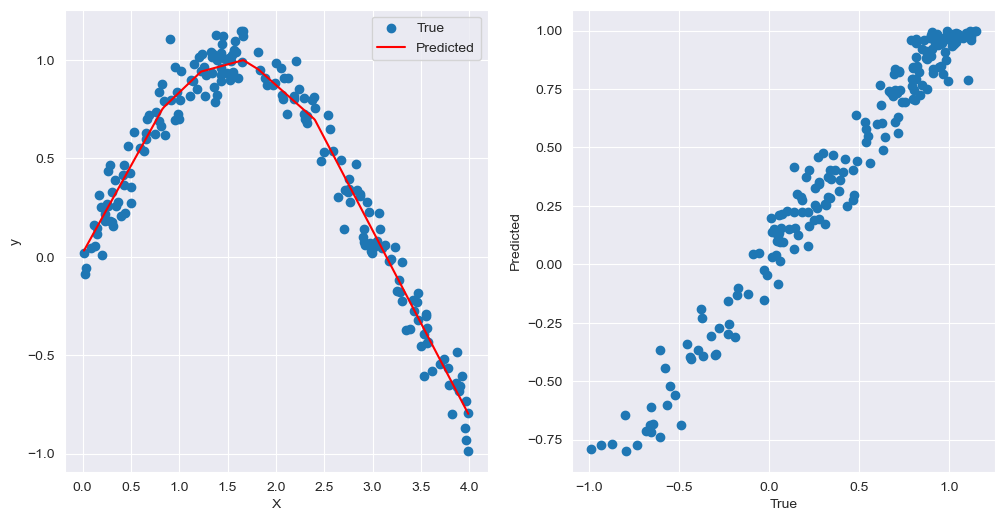

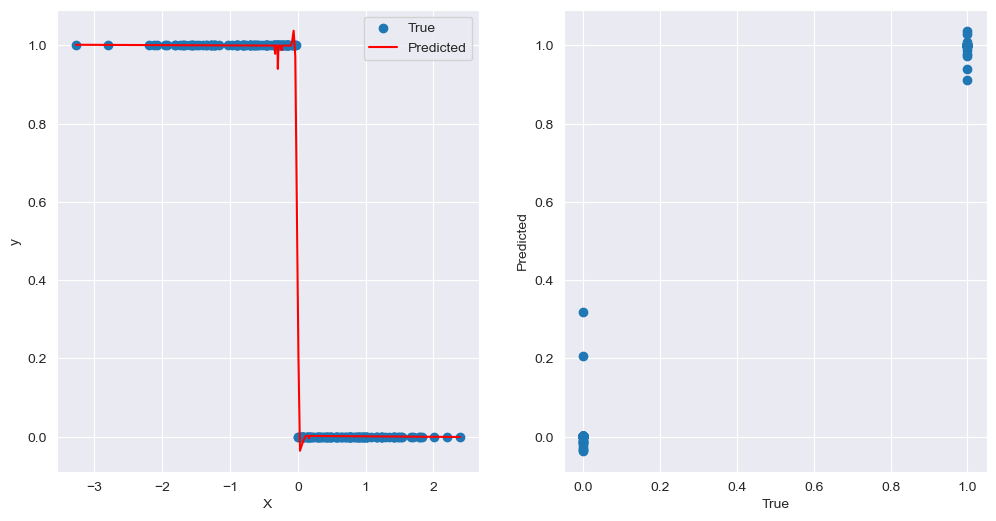

In [31]:
for k in range(1,6):
    gen=generator(1000)
    X,y=gen.generate(k)
    model=Earth()
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
    model.fit(X_train,y_train)
    y_hat=model.predict(X_test)
    fig,ax=plt.subplots(1,2,figsize=(12,6))
    #ax[0].title=f"Comparison of curve for dataset {k}"
    ax[0].scatter(X_test[:,0],y_test,label='True')
    idx=np.argsort(X_test[:,0])
    ax[0].plot(X_test[idx,0],y_hat[idx],label='Predicted',color='red')
    ax[0].set_xlabel('X')
    ax[0].set_ylabel('y')
    ax[0].legend()
    #ax[1].title=f"Comparison true vs predicted for dataset {k}"
    ax[1].scatter(y_test,y_hat)
    ax[1].set_xlabel('True')
    ax[1].set_ylabel('Predicted')
    plt.show()

In [22]:
mod=Earth()
X,y=generator(500).generate(1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
mod.fit(X_train,y_train)
y_hat=mod.predict(X_test)


{'requires_y': False,
 'non_deterministic': False,
 'requires_positive_X': False,
 'requires_positive_y': False,
 'X_types': ['2darray'],
 'poor_score': False,
 'no_validation': False,
 'multioutput': False,
 'allow_nan': False,
 'stateless': False,
 'multilabel': False,
 '_skip_test': False,
 '_xfail_checks': False,
 'multioutput_only': False,
 'binary_only': False,
 'requires_fit': True,
 'preserves_dtype': [numpy.float64],
 'pairwise': False}

{}

In [40]:
import pandas as pd

In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

# Dataset :https://archive.ics.uci.edu/dataset/186/wine+quality

In [54]:
df=pd.read_csv('winequality-red.csv',sep=';',header=0)
y=df["quality"].to_numpy()
X=df.iloc[:,0:11].to_numpy()

In [57]:
def compare_models(X,y):
    kf=KFold(n_splits=5, shuffle=True, random_state=42)
    res={}
    models=[DecisionTreeRegressor(),RandomForestRegressor(),LinearRegression(),Earth()]
    for model in models:
        res[model.__class__.__name__]=[]
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        for model in models:
            model.fit(X_train,y_train)
            y_pred=model.predict(X_test)
            mse=mean_squared_error(y_test,y_pred)
            res[model.__class__.__name__].append(mse)
    df=pd.DataFrame(res)
    plt.figure(figsize=(10,6))
    sns.boxplot(df)

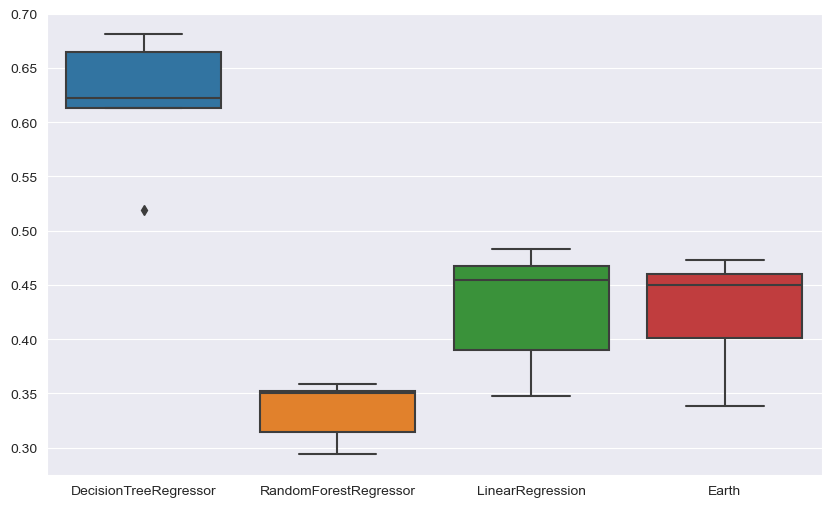

In [58]:
compare_models(X,y)